# Battle of the Neighbourhoods - final project
### Applied Data Science Capstone by IBM/Coursera

# 1.Introduction and Background

## 1.1 Background

The City of Cape Town is the largest metropolitan area in the Western Cape Province and falls apart of the Republic of South Africa. Cape Town is well known for many reasons internationally such as it’s historical landmarks and museums, winelands, Fynbos ecosystem and the stunning Table Mountain. 

Over the years, Cape Town and its city bowl in particular have become one of the main tourist attractions for international tourists to visit throughout the year. 

On top of the large swarms of tourist, the city bowl is also the Central Business District (CBD) of the region which means large amounts of locals flocking to the CBD area for work. This allows for all sorts of small businesses such as telecommunications, restaurants and fast foods joints, informal markets and much more to take profit advantages of a high “people-traffic” area. 

## 1.2 The problem:

After realizing the potential profit advantages of the Cape Town city bowl, a small business is looking to open a new coffee shop in the city bowl of Cape Town area. 
They would like to determine the most ideal location to open their coffee shop and have three key requirements that need to be met when find the best location:

1.	There must be high foot traffic in the vicinity of the shop to maximize number of potential buyers
2.	There must be few other coffee stores to minimize competition
3.	There must be surrounding businesses to further maximize foot traffic

These points are ordered according to the priority of the requirement being met. 

This means that, for the purpose of this shop, high foot traffic is the most import factor to consider when determining where to locate the store, then the number of competitors, followed by the surrounding stores. What this means is that we are willing to endure a certain level of competitors for the chance of having higher foot traffic, and therefore, more customers.

One of the issues with minimizing other coffee stores in the area (mentioned in point 2 above) is that sometimes competitors actually bring people into the area and locating the store away from competitors might also move us away from potential high foot traffic areas. For this reason, we are willing to sacrifice having a low competition area for one that has high foot traffic, many surrounding businesses and does have a higher number of competitors.

This business also has no preference between targeting tourists and locals but has the intention of holding its market edge with being a low-cost coffee store. Generally, tourist travel with the expectation to spend money and do not necessarily have the same knowledge as locals in terms of what is cheap, averagely priced or expensive coffee. Also, they may gravitate to brands they know such as Settle Coffee, Starbucks or Mugg&Bean. For this reason, we will not be focusing on tourists but rather where the locals will be, for example, in the central business district who are more likely to return to a store that offers quality coffee at a fair price.

To sum it up, the ideal location for this store has high foot traffic, low competition and surrounding businesses that will attract more customers to our store, we will trade low competition area for one with higher foot traffic and surrounding businesses, and we are focusing on “local” areas instead of “tourist” areas.

## 1.3 Interest:

Obviously, the business mentioned above that is looking to open the store will be the most interested in this investigation. Others who may be interested include other individuals or companies that are also trying to open coffee stores or similar stores that have the same requirements location requirements as the business we are completing this analysis for. 


# 2. Description of data and data sources

Description of data is available in the final report of this analysis

# 3. Methology

## 3.1 Importing Python packages

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

## 3.2 Coordinates for the City of Cape Town

The first thing we require is a starting point. Let's generate the coordinates for the City of Cape Town.

In [7]:
# Get corrdinates for Cape Town

address = 'Cape Town, WC'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cape Town are {}, {}.'.format(latitude, longitude))


CapeTown_Centre = [latitude, longitude]

The geograpical coordinate of Cape Town are -33.928992, 18.417396.


In [8]:
CapeTown_Centre

[-33.928992, 18.417396]

## 3.3 Transportation Routes Data Gathering

Next we use the Foursquare API to get the transport route data points for Cape Town

In [10]:
CLIENT_ID = 'F0STA2MIZTR0ER15COYFVE0PQ3VMYEWHLF0EGKCRLW0RR3L3' # your Foursquare ID
CLIENT_SECRET = '23ZTC5MUIL1ZEOZ2W1JGOGEULDTIM4MB1NUVG4GXT5QEY2GN' # your Foursquare Secret
VERSION = '20200717' # Foursquare API version

In [26]:
#Creating the API for the Transport routes

radius = 5000
limit = 1000
categoryId = ['4c38df4de52ce0d596b336e1','4bf58dd8d48988d1fe931735','4bf58dd8d48988d12b951735','52f2ab2ebcbc57f1066b8b4f','4bf58dd8d48988d1fc931735','4bf58dd8d48988d1fd931735','4bf58dd8d48988d129951735','54541b70498ea6ccd0204bff','53fca564498e1a175f32528b']

# create URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4c38df4de52ce0d596b336e1,4bf58dd8d48988d1fe931735,4bf58dd8d48988d12b951735,52f2ab2ebcbc57f1066b8b4f,4bf58dd8d48988d1fc931735,4bf58dd8d48988d1fd931735,4bf58dd8d48988d129951735,54541b70498ea6ccd0204bff,53fca564498e1a175f32528b'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    limit,
    categoryId 
)
url


'https://api.foursquare.com/v2/venues/search?&client_id=F0STA2MIZTR0ER15COYFVE0PQ3VMYEWHLF0EGKCRLW0RR3L3&client_secret=23ZTC5MUIL1ZEOZ2W1JGOGEULDTIM4MB1NUVG4GXT5QEY2GN&v=20200717&ll=-33.928992,18.417396&radius=5000&limit=1000&categoryId=4c38df4de52ce0d596b336e1,4bf58dd8d48988d1fe931735,4bf58dd8d48988d12b951735,52f2ab2ebcbc57f1066b8b4f,4bf58dd8d48988d1fc931735,4bf58dd8d48988d1fd931735,4bf58dd8d48988d129951735,54541b70498ea6ccd0204bff,53fca564498e1a175f32528b'

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f180faa5b9a415352a392dc'},
 'response': {'venues': [{'id': '4e53d336aeb74b74581b7bb3',
    'name': 'MyCiti Buitensingel',
    'location': {'lat': -33.92692974587779,
     'lng': 18.41347269429279,
     'labeledLatLngs': [{'label': 'display',
       'lat': -33.92692974587779,
       'lng': 18.41347269429279}],
     'distance': 428,
     'cc': 'ZA',
     'city': 'iKapa',
     'state': 'Western Cape',
     'country': 'iNingizimu Afrika',
     'formattedAddress': ['iKapa', 'iNingizimu Afrika']},
    'categories': [{'id': '4bf58dd8d48988d12b951735',
      'name': 'Bus Line',
      'pluralName': 'Bus Lines',
      'shortName': 'Bus',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1595412532',
    'hasPerk': False},
   {'id': '52f4746811d22fb58571b779',
    'name': 'Blue Train Station',
    'location': {'address': 'Old Marine Drive',
     'lat': 

In [28]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
venues = results['response']['venues']

# tranform venues into a dataframe
Trans = json_normalize(venues)


filtered_columns = ['name', 'categories'] + [col for col in Trans.columns if col.startswith('location.')] + ['id']
Trans_filtered = Trans.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
Trans_filtered['categories'] = Trans_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
Trans_filtered.columns = [column.split('.')[-1] for column in Trans_filtered.columns]
Trans_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,MyCiti Buitensingel,Bus Line,NaN,ZA,iKapa,iNingizimu Afrika,NaN,428,"[iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9269297458777...",-33.926930,18.413473,NaN,Western Cape,4e53d336aeb74b74581b7bb3
1,Blue Train Station,Platform,Old Marine Drive,ZA,iKapa,iNingizimu Afrika,NaN,1275,"[Old Marine Drive, iKapa, 8001, iNingizimu Afr...","[{'label': 'display', 'lat': -33.9216042607502...",-33.921604,18.427945,8001,Western Cape,52f4746811d22fb58571b779
2,Cape Town Railway Station,Train Station,Cape Town,ZA,iKapa,iNingizimu Afrika,NaN,1075,"[Cape Town, iKapa, 8000, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9220315944988...",-33.922032,18.425467,8000,Western Cape,4b6840f0f964a520316e2be3
3,MyCiTi Station Adderley St,Bus Station,Adderley St,ZA,iKapa,iNingizimu Afrika,Hans Strijdom,1171,"[Adderley St (Hans Strijdom), iKapa, 8001, iNi...","[{'label': 'display', 'lat': -33.9204993750804...",-33.920499,18.424889,8001,Western Cape,53356df5498e72792be4d621
4,MyCiTi Station - Queens Beach,Bus Station,Beach Rd,ZA,iKapa,iNingizimu Afrika,NaN,3589,"[Beach Rd, iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.92124, 'lng':...",-33.921240,18.379675,NaN,Western Cape,5288ae5211d2141697933734
5,MyCiTi Bus Station Strand,Bus Station,Strand St,ZA,iKapa,iNingizimu Afrika,Loop St,1031,"[Strand St (Loop St), iKapa, 8000, iNingizimu ...","[{'label': 'display', 'lat': -33.9201049804687...",-33.920105,18.420546,8000,Western Cape,5290e76e11d22474e261c241
6,Picbel Parkade,Parking,Waterkant Street,ZA,iKapa,iNingizimu Afrika,NaN,974,"[Waterkant Street, iKapa, 8000, iNingizimu Afr...","[{'label': 'display', 'lat': -33.9211408581725...",-33.921141,18.422067,8000,Western Cape,4c5badda6147be9acb628d09
7,Jammie Stop&Drop,Bus Line,NaN,ZA,iKapa,iNingizimu Afrika,NaN,5297,"[iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9605069170288...",-33.960507,18.460384,NaN,Western Cape,4ee9e413aa1f7c78108568ce
8,MyCiti Bus Station Civic Centre,Bus Station,Hertzog Blvd,ZA,iKapa,iNingizimu Afrika,D F Malan,1445,"[Hertzog Blvd (D F Malan), iKapa, iNingizimu A...","[{'label': 'display', 'lat': -33.9205914379767...",-33.920591,18.429325,NaN,Western Cape,4ca2d4d0750ca093d3dd1367
9,sightseeing (blue bus),Bus Line,NaN,ZA,iKapa,iNingizimu Afrika,NaN,2352,"[iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.907859, 'lng'...",-33.907859,18.417772,NaN,Western Cape,599566624940bc319469c33d


In [30]:
Trans_filtered.shape

(42, 15)

In [31]:
#Checking to see if any categories are not applicable to Transportation routes 

trans_final = Trans_filtered.groupby('categories')['name'].nunique()
trans_final

categories
Bus Line                   6
Bus Station               18
Bus Stop                   3
Light Rail Station         1
Metro Station              1
Parking                    3
Platform                   3
Train Station              6
Transportation Service     1
Name: name, dtype: int64

Transportations locations in the City bowl has been imported and successfully checked for any areas and data that might have to be droped. 

Next we plot these locations/points on a map using the Folium library

In [32]:
from folium import Map, CircleMarker


#Generate new map of Cape Town
map_CT_trans = folium.Map(location=[latitude, longitude], zoom_start=14)

# add the transportion point as blue circle markers
for lat, lng, label in zip(Trans_filtered.lat,Trans_filtered.lng, Trans_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=folium.Popup(label, parse_html=True),
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_CT_trans)

# display map
map_CT_trans


## 3.4 Local Coffee Shops Data Gathering

Next we need to evaluate the local coffee stores

In [181]:
# Create the url to get the coffee shop details for gathering the coffee store details

categoryId = '4bf58dd8d48988d1e0931735', '4bf58dd8d48988d16d941735'
radius = 5000
limit = 1000


# create URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4bf58dd8d48988d1e0931735,4bf58dd8d48988d16d941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    limit,
    categoryId 
)
url


'https://api.foursquare.com/v2/venues/search?&client_id=F0STA2MIZTR0ER15COYFVE0PQ3VMYEWHLF0EGKCRLW0RR3L3&client_secret=23ZTC5MUIL1ZEOZ2W1JGOGEULDTIM4MB1NUVG4GXT5QEY2GN&v=20200717&ll=-33.928992,18.417396&radius=5000&limit=1000&categoryId=4bf58dd8d48988d1e0931735,4bf58dd8d48988d16d941735'

In [182]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f183c04acc3b6486d02070a'},
 'response': {'venues': [{'id': '5ddf97ae91dc9d0007763a6d',
    'name': 'Shift Espresso Bar',
    'location': {'address': 'Temple House',
     'crossStreet': 'Buitenkant Street',
     'lat': -33.929508,
     'lng': 18.421609,
     'labeledLatLngs': [{'label': 'display',
       'lat': -33.929508,
       'lng': 18.421609}],
     'distance': 393,
     'postalCode': '8001',
     'cc': 'ZA',
     'city': 'iKapa',
     'state': 'Western Cape',
     'country': 'iNingizimu Afrika',
     'formattedAddress': ['Temple House (Buitenkant Street)',
      'iKapa',
      '8001',
      'iNingizimu Afrika']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1595424410',
    'hasPerk':

In [183]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [184]:
venues = results['response']['venues']

# tranform venues into a dataframe
Coffeeshops = json_normalize(venues)


filtered_columns = ['name', 'categories'] + [col for col in Coffeeshops.columns if col.startswith('location.')] + ['id']
Coffeeshops_filtered = Coffeeshops.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
Coffeeshops_filtered['categories'] = Coffeeshops_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
Coffeeshops_filtered.columns = [column.split('.')[-1] for column in Coffeeshops_filtered.columns]
Coffeeshops_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Shift Espresso Bar,Coffee Shop,Temple House,ZA,iKapa,iNingizimu Afrika,Buitenkant Street,393,"[Temple House (Buitenkant Street), iKapa, 8001...","[{'label': 'display', 'lat': -33.929508, 'lng'...",-33.929508,18.421609,NaN,8001,Western Cape,5ddf97ae91dc9d0007763a6d
1,Deluxe Coffeeworks,Coffee Shop,171A Buitenkant Street,ZA,iKapa,iNingizimu Afrika,Buitenkant,531,"[171A Buitenkant Street (Buitenkant), iKapa, 8...","[{'label': 'display', 'lat': -33.933453, 'lng'...",-33.933453,18.419453,Gardens,8001,Western Cape,50123ab3e4b0f8ec77991df4
2,Coco Safar,Café,"277 Main Road, Sea Point",ZA,iKapa,iNingizimu Afrika,Rocklands,2956,"[277 Main Road, Sea Point (Rocklands), iKapa, ...","[{'label': 'display', 'lat': -33.9104444334511...",-33.910444,18.394490,Sea Point,8001,Western Cape,5a5f2e9bdd70c55eccf59824
3,The Big Box Café,Gaming Cafe,18 Roeland Street,ZA,iKapa,iNingizimu Afrika,NaN,87,"[18 Roeland Street, iKapa, 8001, iNingizimu Af...","[{'label': 'display', 'lat': -33.9289868412050...",-33.928987,18.418347,NaN,8001,Western Cape,558e6cf4498e642c84853d99
4,Dapper Coffee Co.,Coffee Shop,Bree st,ZA,Cape Town CBD - Foreshore,iNingizimu Afrika,Strand,1055,"[Bree st (Strand), Cape Town CBD - Foreshore, ...","[{'label': 'display', 'lat': -33.9197162415488...",-33.919716,18.419760,NaN,8000,Western Cape,5680ebf7498ea638fca300f5
5,Folk Coffee Anthropology,Coffee Shop,"Touchstone House, 8 Bree Str",ZA,iKapa,iNingizimu Afrika,NaN,1351,"[Touchstone House, 8 Bree Str, iKapa, iNingizi...","[{'label': 'display', 'lat': -33.9175347227082...",-33.917535,18.422235,Cape Town CBD - Foreshore,NaN,Western Cape,56a92621498ec39c6d1af9f9
6,Knead Bakery,Bakery,Kloof St.,ZA,iKapa,iNingizimu Afrika,NaN,574,"[Kloof St., iKapa, 8001, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9294985608820...",-33.929499,18.411204,NaN,8001,Western Cape,4ee72f10d3e34ebcf25c1dc8
7,Bootlegger Coffee Company,Coffee Shop,Woodstock Quarter,ZA,iKapa,iNingizimu Afrika,187 Sir Lowry Road,2476,"[Woodstock Quarter (187 Sir Lowry Road), iKapa...","[{'label': 'display', 'lat': -33.926216, 'lng'...",-33.926216,18.444001,NaN,7925,Western Cape,5dda52e9854ca200089bf69c
8,Bootlegger Coffee Company,Coffee Shop,Victoria Road,ZA,Camps Bay,iNingizimu Afrika,NaN,5431,"[Victoria Road, Camps Bay, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9620355967295...",-33.962036,18.374120,NaN,NaN,Western Cape,586e4147bf1a6d4d6c199914
9,Bootleggers Coffee Company - Cape Quarter,Coffee Shop,Cape Quarter,ZA,iKapa,iNingizimu Afrika,Somerset Rd,1476,"[Cape Quarter (Somerset Rd), iKapa, iNingizimu...","[{'label': 'display', 'lat': -33.91574, 'lng':...",-33.915740,18.417986,NaN,NaN,Western Cape,56767e60498e8c399b1690ed


In [185]:
Coffeeshops_filtered.shape

(49, 16)

In [186]:
#Checking for categories that don't match with out coffee shop category

Coffeeshops_categories = Coffeeshops_filtered.groupby('categories')['name'].nunique()
Coffeeshops_categories

categories
Bakery                      1
Bar                         1
Café                       16
Coffee Shop                25
Gaming Cafe                 1
New American Restaurant     1
Name: name, dtype: int64

In [188]:
#Dropping 4 categories from list - Bakery, Bar, Gaming Cafe' and New American Restaurant because they do not fall into our interest criteria 

Drop_columns = ['Bakery', 'Bar', 'Gaming Cafe', 'New American Restaurant']

indexNames = Coffeeshops_filtered[Coffeeshops_filtered['categories'] == 'Bakery' ].index
Coffeeshops_filtered.drop(indexNames , inplace=True)

indexNames2 = Coffeeshops_filtered[Coffeeshops_filtered['categories'] == 'Bar' ].index
Coffeeshops_filtered.drop(indexNames2 , inplace=True)

indexNames3 = Coffeeshops_filtered[Coffeeshops_filtered['categories'] == 'Gaming Cafe' ].index
Coffeeshops_filtered.drop(indexNames3 , inplace=True)

indexNames4 = Coffeeshops_filtered[Coffeeshops_filtered['categories'] == 'New American Restaurant' ].index
Coffeeshops_filtered.drop(indexNames4 , inplace=True)

# Delete these row indexes from dataFrame
Coffeeshops_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Shift Espresso Bar,Coffee Shop,Temple House,ZA,iKapa,iNingizimu Afrika,Buitenkant Street,393,"[Temple House (Buitenkant Street), iKapa, 8001...","[{'label': 'display', 'lat': -33.929508, 'lng'...",-33.929508,18.421609,NaN,8001,Western Cape,5ddf97ae91dc9d0007763a6d
1,Deluxe Coffeeworks,Coffee Shop,171A Buitenkant Street,ZA,iKapa,iNingizimu Afrika,Buitenkant,531,"[171A Buitenkant Street (Buitenkant), iKapa, 8...","[{'label': 'display', 'lat': -33.933453, 'lng'...",-33.933453,18.419453,Gardens,8001,Western Cape,50123ab3e4b0f8ec77991df4
2,Coco Safar,Café,"277 Main Road, Sea Point",ZA,iKapa,iNingizimu Afrika,Rocklands,2956,"[277 Main Road, Sea Point (Rocklands), iKapa, ...","[{'label': 'display', 'lat': -33.9104444334511...",-33.910444,18.394490,Sea Point,8001,Western Cape,5a5f2e9bdd70c55eccf59824
4,Dapper Coffee Co.,Coffee Shop,Bree st,ZA,Cape Town CBD - Foreshore,iNingizimu Afrika,Strand,1055,"[Bree st (Strand), Cape Town CBD - Foreshore, ...","[{'label': 'display', 'lat': -33.9197162415488...",-33.919716,18.419760,NaN,8000,Western Cape,5680ebf7498ea638fca300f5
5,Folk Coffee Anthropology,Coffee Shop,"Touchstone House, 8 Bree Str",ZA,iKapa,iNingizimu Afrika,NaN,1351,"[Touchstone House, 8 Bree Str, iKapa, iNingizi...","[{'label': 'display', 'lat': -33.9175347227082...",-33.917535,18.422235,Cape Town CBD - Foreshore,NaN,Western Cape,56a92621498ec39c6d1af9f9
7,Bootlegger Coffee Company,Coffee Shop,Woodstock Quarter,ZA,iKapa,iNingizimu Afrika,187 Sir Lowry Road,2476,"[Woodstock Quarter (187 Sir Lowry Road), iKapa...","[{'label': 'display', 'lat': -33.926216, 'lng'...",-33.926216,18.444001,NaN,7925,Western Cape,5dda52e9854ca200089bf69c
8,Bootlegger Coffee Company,Coffee Shop,Victoria Road,ZA,Camps Bay,iNingizimu Afrika,NaN,5431,"[Victoria Road, Camps Bay, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9620355967295...",-33.962036,18.374120,NaN,NaN,Western Cape,586e4147bf1a6d4d6c199914
9,Bootleggers Coffee Company - Cape Quarter,Coffee Shop,Cape Quarter,ZA,iKapa,iNingizimu Afrika,Somerset Rd,1476,"[Cape Quarter (Somerset Rd), iKapa, iNingizimu...","[{'label': 'display', 'lat': -33.91574, 'lng':...",-33.915740,18.417986,NaN,NaN,Western Cape,56767e60498e8c399b1690ed
10,Vida É Caffe,Coffee Shop,Gardens Centre,ZA,iKapa,iNingizimu Afrika,NaN,574,"[Gardens Centre, iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9341335635713...",-33.934134,18.417918,NaN,NaN,Western Cape,52c14f83498e31d38761c3ff
11,Bootlegger Coffee Company,Coffee Shop,NaN,ZA,iKapa,iNingizimu Afrika,NaN,610,"[iKapa, 7925, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.928346, 'lng'...",-33.928346,18.423961,NaN,7925,Western Cape,5ac4628e5a2c9146af478a61


In [189]:
Coffeeshops_filtered.shape

(45, 16)

Coffee shop locations in the City bowl has been imported and successfully checked for any areas and data that might have to be droped.

Next we plot these locations/points on a map using the Folium library

In [190]:

#Generate new map of Cape Town
map_CT_coffee = folium.Map(location=[latitude, longitude], zoom_start=14)

# add the Coffee shops as red circle markers
for lat, lng, label in zip(Coffeeshops_filtered.lat,Coffeeshops_filtered.lng, Coffeeshops_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=folium.Popup(label, parse_html=True),
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(map_CT_coffee)

# display map
map_CT_coffee


## 3.5 Surrounding Business Data Gathering 

Finally let's bring in the Surrounding businesses data points

In [99]:
# Create url to retrieve the surrounding business data for Cape Town

categoryId = ['4d4b7105d754a06375d81259','4bf58dd8d48988d124941735','4bf58dd8d48988d13b941735','4d4b7105d754a06378d81259']
radius = 5000
limit = 1000


# create URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4d4b7105d754a06375d81259,4bf58dd8d48988d124941735,4bf58dd8d48988d13b941735,4d4b7105d754a06378d81259'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    limit,
    categoryId 
)
url

'https://api.foursquare.com/v2/venues/search?&client_id=F0STA2MIZTR0ER15COYFVE0PQ3VMYEWHLF0EGKCRLW0RR3L3&client_secret=23ZTC5MUIL1ZEOZ2W1JGOGEULDTIM4MB1NUVG4GXT5QEY2GN&v=20200717&ll=-33.928992,18.417396&radius=5000&limit=1000&categoryId=4d4b7105d754a06375d81259,4bf58dd8d48988d124941735,4bf58dd8d48988d13b941735,4d4b7105d754a06378d81259'

In [100]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f18192251d07f34bc1bdbf2'},
 'response': {'venues': [{'id': '4b75386ff964a52096012ee3',
    'name': 'Parliament of South Africa',
    'location': {'address': 'Parliament St',
     'crossStreet': 'Cape Town City Centre',
     'lat': -33.926625,
     'lng': 18.419877,
     'labeledLatLngs': [{'label': 'display',
       'lat': -33.926625,
       'lng': 18.419877}],
     'distance': 349,
     'postalCode': '8000',
     'cc': 'ZA',
     'city': 'iKapa',
     'state': 'Western Cape',
     'country': 'iNingizimu Afrika',
     'formattedAddress': ['Parliament St (Cape Town City Centre)',
      'iKapa',
      '8000',
      'iNingizimu Afrika']},
    'categories': [{'id': '4bf58dd8d48988d126941735',
      'name': 'Government Building',
      'pluralName': 'Government Buildings',
      'shortName': 'Government',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_',
       'suffix': '.png'},
      'primary': True}],
    'referr

In [101]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [102]:
venues = results['response']['venues']

# tranform venues into a dataframe
businesses = json_normalize(venues)


filtered_columns = ['name', 'categories'] + [col for col in Coffeeshops.columns if col.startswith('location.')] + ['id']
businesses_filtered = businesses.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
businesses_filtered['categories'] = businesses_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
businesses_filtered.columns = [column.split('.')[-1] for column in businesses_filtered.columns]
businesses_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Parliament of South Africa,Government Building,Parliament St,ZA,iKapa,iNingizimu Afrika,Cape Town City Centre,349,"[Parliament St (Cape Town City Centre), iKapa,...","[{'label': 'display', 'lat': -33.926625, 'lng'...",-33.926625,18.419877,NaN,8000,Western Cape,4b75386ff964a52096012ee3
1,The Butcher Man,Butcher,105 Main Rd.,ZA,iKapa,iNingizimu Afrika,NaN,2476,"[105 Main Rd., iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9077590154435...",-33.907759,18.409406,NaN,NaN,Western Cape,51dabcef498e70184c5d0d3e
2,Engen Woolworths 1stop,Gas Station,134 Main Rd,ZA,iKapa,iNingizimu Afrika,NaN,2962,"[134 Main Rd, iKapa, 8005, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9134527328575...",-33.913453,18.391355,Sea Point,8005,Western Cape,4d26225af9406dcb4a3f928d
3,Engen Quick Shop,Gas Station,Mill St,ZA,iKapa,iNingizimu Afrika,St Johns St,503,"[Mill St (St Johns St), iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9329923304311...",-33.932992,18.414853,NaN,NaN,Western Cape,4b75b73ef964a520381f2ee3
4,Engen Petrol Station,Gas Station,61 Kloof St,ZA,iKapa,iNingizimu Afrika,NaN,568,"[61 Kloof St, iKapa, 8001, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.92972769, 'ln...",-33.929728,18.411303,NaN,8001,Western Cape,4d1add2011fca093b6d299ce
5,BMW Motorrad Donford Cape Town,Motorcycle Shop,112 Buitengracht St,ZA,iKapa,iNingizimu Afrika,NaN,905,"[112 Buitengracht St, iKapa, 8001, iNingizimu ...","[{'label': 'display', 'lat': -33.92088435, 'ln...",-33.920884,18.416645,NaN,8001,Western Cape,563dd027cd10d221457b5a40
6,Waterfront Film Studios,Film Studio,1 Port Road,ZA,iKapa,iNingizimu Afrika,Bennett Street,1934,"[1 Port Road (Bennett Street), iKapa, iNingizi...","[{'label': 'display', 'lat': -33.9116408880965...",-33.911641,18.418480,Cape Town CBD,NaN,Western Cape,516bee9de4b06e89cd3e3631
7,Urban Men,Salon / Barbershop,Cape Quarters,ZA,Cape Town,iNingizimu Afrika,7 Jarvis Street,1479,"[Cape Quarters (7 Jarvis Street), Cape Town, i...","[{'label': 'display', 'lat': -33.9157062071829...",-33.915706,18.417524,NaN,NaN,Urban Men,5241b35d498ef0b3dde8442f
8,Christiaan Barnard Memorial Hospital,Hospital,NaN,ZA,iKapa,iNingizimu Afrika,NaN,1724,"[iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.917799, 'lng'...",-33.917799,18.430297,NaN,NaN,Western Cape,5894222d4f218a63bf010589
9,Timbercity,Hardware Store,"Fairview Ave, Woodstock",ZA,iKapa,iNingizimu Afrika,At Victoria Ave.,3201,"[Fairview Ave, Woodstock (At Victoria Ave.), i...","[{'label': 'display', 'lat': -33.9307508336707...",-33.930751,18.451990,NaN,7925,Western Cape,4daec9afced7e6a8d79f92d8


In [103]:
businesses_filtered.shape

(49, 16)

In [166]:
# Declare a list that is to be converted into a column 
count = 1
  
# and equating it to the list 
businesses_filtered['count'] = count 
businesses_filtered['count'] = pd.to_numeric(businesses_filtered['count'])

# Observe the result 
businesses_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,count
0,Parliament of South Africa,Government Building,Parliament St,ZA,iKapa,iNingizimu Afrika,Cape Town City Centre,349,"[Parliament St (Cape Town City Centre), iKapa,...","[{'label': 'display', 'lat': -33.926625, 'lng'...",-33.926625,18.419877,NaN,8000,Western Cape,4b75386ff964a52096012ee3,1
1,The Butcher Man,Butcher,105 Main Rd.,ZA,iKapa,iNingizimu Afrika,NaN,2476,"[105 Main Rd., iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9077590154435...",-33.907759,18.409406,NaN,NaN,Western Cape,51dabcef498e70184c5d0d3e,1
2,Engen Woolworths 1stop,Gas Station,134 Main Rd,ZA,iKapa,iNingizimu Afrika,NaN,2962,"[134 Main Rd, iKapa, 8005, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9134527328575...",-33.913453,18.391355,Sea Point,8005,Western Cape,4d26225af9406dcb4a3f928d,1
3,Engen Quick Shop,Gas Station,Mill St,ZA,iKapa,iNingizimu Afrika,St Johns St,503,"[Mill St (St Johns St), iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.9329923304311...",-33.932992,18.414853,NaN,NaN,Western Cape,4b75b73ef964a520381f2ee3,1
4,Engen Petrol Station,Gas Station,61 Kloof St,ZA,iKapa,iNingizimu Afrika,NaN,568,"[61 Kloof St, iKapa, 8001, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.92972769, 'ln...",-33.929728,18.411303,NaN,8001,Western Cape,4d1add2011fca093b6d299ce,1
5,BMW Motorrad Donford Cape Town,Motorcycle Shop,112 Buitengracht St,ZA,iKapa,iNingizimu Afrika,NaN,905,"[112 Buitengracht St, iKapa, 8001, iNingizimu ...","[{'label': 'display', 'lat': -33.92088435, 'ln...",-33.920884,18.416645,NaN,8001,Western Cape,563dd027cd10d221457b5a40,1
6,Waterfront Film Studios,Film Studio,1 Port Road,ZA,iKapa,iNingizimu Afrika,Bennett Street,1934,"[1 Port Road (Bennett Street), iKapa, iNingizi...","[{'label': 'display', 'lat': -33.9116408880965...",-33.911641,18.418480,Cape Town CBD,NaN,Western Cape,516bee9de4b06e89cd3e3631,1
7,Urban Men,Salon / Barbershop,Cape Quarters,ZA,Cape Town,iNingizimu Afrika,7 Jarvis Street,1479,"[Cape Quarters (7 Jarvis Street), Cape Town, i...","[{'label': 'display', 'lat': -33.9157062071829...",-33.915706,18.417524,NaN,NaN,Urban Men,5241b35d498ef0b3dde8442f,1
8,Christiaan Barnard Memorial Hospital,Hospital,NaN,ZA,iKapa,iNingizimu Afrika,NaN,1724,"[iKapa, iNingizimu Afrika]","[{'label': 'display', 'lat': -33.917799, 'lng'...",-33.917799,18.430297,NaN,NaN,Western Cape,5894222d4f218a63bf010589,1
9,Timbercity,Hardware Store,"Fairview Ave, Woodstock",ZA,iKapa,iNingizimu Afrika,At Victoria Ave.,3201,"[Fairview Ave, Woodstock (At Victoria Ave.), i...","[{'label': 'display', 'lat': -33.9307508336707...",-33.930751,18.451990,NaN,7925,Western Cape,4daec9afced7e6a8d79f92d8,1


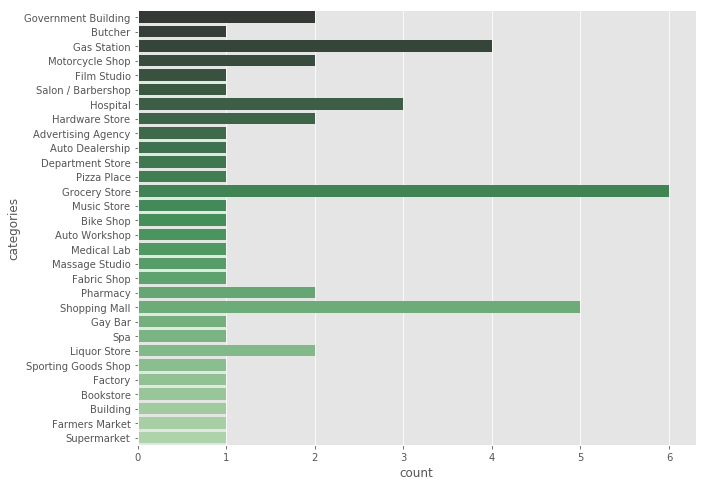

In [176]:
import seaborn as sns

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(y=businesses_filtered['categories'], ax=ax, data=businesses_filtered, palette="Greens_d")


In [177]:

#Generate new map of Cape Town
map_CT_businesses = folium.Map(location=[latitude, longitude], zoom_start=14)

# add the businesses as green circle markers
for lat, lng, label in zip(businesses_filtered.lat,businesses_filtered.lng, businesses_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=folium.Popup(label, parse_html=True),
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(map_CT_businesses)

# display map
map_CT_businesses


## 3.6 Cluster Analysis

Next we are going to create clusters to determine which will be most suitable for the coffee shop. We will start but putting all the location data together in one large Pandas' Dataframe

In [191]:
final_data = Trans_filtered.append(Coffeeshops_filtered, ignore_index = True) 
final_data = final_data.append(businesses_filtered, ignore_index = True)
final_data

,address,categories,cc,city,count,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,state
0,NaN,Bus Line,ZA,iKapa,NaN,iNingizimu Afrika,NaN,428,"[iKapa, iNingizimu Afrika]",4e53d336aeb74b74581b7bb3,"[{'label': 'display', 'lat': -33.9269297458777...",-33.926930,18.413473,MyCiti Buitensingel,NaN,NaN,Western Cape
1,Old Marine Drive,Platform,ZA,iKapa,NaN,iNingizimu Afrika,NaN,1275,"[Old Marine Drive, iKapa, 8001, iNingizimu Afr...",52f4746811d22fb58571b779,"[{'label': 'display', 'lat': -33.9216042607502...",-33.921604,18.427945,Blue Train Station,NaN,8001,Western Cape
2,Cape Town,Train Station,ZA,iKapa,NaN,iNingizimu Afrika,NaN,1075,"[Cape Town, iKapa, 8000, iNingizimu Afrika]",4b6840f0f964a520316e2be3,"[{'label': 'display', 'lat': -33.9220315944988...",-33.922032,18.425467,Cape Town Railway Station,NaN,8000,Western Cape
3,Adderley St,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,Hans Strijdom,1171,"[Adderley St (Hans Strijdom), iKapa, 8001, iNi...",53356df5498e72792be4d621,"[{'label': 'display', 'lat': -33.9204993750804...",-33.920499,18.424889,MyCiTi Station Adderley St,NaN,8001,Western Cape
4,Beach Rd,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,NaN,3589,"[Beach Rd, iKapa, iNingizimu Afrika]",5288ae5211d2141697933734,"[{'label': 'display', 'lat': -33.92124, 'lng':...",-33.921240,18.379675,MyCiTi Station - Queens Beach,NaN,NaN,Western Cape
5,Strand St,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,Loop St,1031,"[Strand St (Loop St), iKapa, 8000, iNingizimu ...",5290e76e11d22474e261c241,"[{'label': 'display', 'lat': -33.9201049804687...",-33.920105,18.420546,MyCiTi Bus Station Strand,NaN,8000,Western Cape
6,Waterkant Street,Parking,ZA,iKapa,NaN,iNingizimu Afrika,NaN,974,"[Waterkant Street, iKapa, 8000, iNingizimu Afr...",4c5badda6147be9acb628d09,"[{'label': 'display', 'lat': -33.9211408581725...",-33.921141,18.422067,Picbel Parkade,NaN,8000,Western Cape
7,NaN,Bus Line,ZA,iKapa,NaN,iNingizimu Afrika,NaN,5297,"[iKapa, iNingizimu Afrika]",4ee9e413aa1f7c78108568ce,"[{'label': 'display', 'lat': -33.9605069170288...",-33.960507,18.460384,Jammie Stop&Drop,NaN,NaN,Western Cape
8,Hertzog Blvd,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,D F Malan,1445,"[Hertzog Blvd (D F Malan), iKapa, iNingizimu A...",4ca2d4d0750ca093d3dd1367,"[{'label': 'display', 'lat': -33.9205914379767...",-33.920591,18.429325,MyCiti Bus Station Civic Centre,NaN,NaN,Western Cape
9,NaN,Bus Line,ZA,iKapa,NaN,iNingizimu Afrika,NaN,2352,"[iKapa, iNingizimu Afrika]",599566624940bc319469c33d,"[{'label': 'display', 'lat': -33.907859, 'lng'...",-33.907859,18.417772,sightseeing (blue bus),NaN,NaN,Western Cape


In [192]:
final_data['categories'].unique()

array(['Bus Line', 'Platform', 'Train Station', 'Bus Station', 'Parking',
       'Light Rail Station', 'Bus Stop', 'Transportation Service',
       'Metro Station', 'Coffee Shop', 'Café', 'Government Building',
       'Butcher', 'Gas Station', 'Motorcycle Shop', 'Film Studio',
       'Salon / Barbershop', 'Hospital', 'Hardware Store',
       'Advertising Agency', 'Auto Dealership', 'Department Store',
       'Pizza Place', 'Grocery Store', 'Music Store', 'Bike Shop',
       'Auto Workshop', 'Medical Lab', 'Massage Studio', 'Fabric Shop',
       'Pharmacy', 'Shopping Mall', 'Gay Bar', 'Spa', 'Liquor Store',
       'Sporting Goods Shop', 'Factory', 'Bookstore', 'Building',
       'Farmers Market', 'Supermarket'], dtype=object)

In [194]:
#Set High Level categories to assist in our cluster analysis

transport = ['Bus Line', 'Platform', 'Train Station', 'Bus Station', 'Parking', 'Light Rail Station', 'Bus Stop', 'Transportation Service', 'Metro Station']
coffee = ['Coffee Shop', 'Café']
businesses = ['Government Building','Butcher', 'Gas Station', 'Motorcycle Shop', 'Film Studio', 'Salon / Barbershop', 'Hospital', 'Hardware Store', 'Advertising Agency', 'Auto Dealership', 'Department Store',
       'Pizza Place', 'Grocery Store', 'Music Store', 'Bike Shop', 'Auto Workshop', 'Medical Lab', 'Massage Studio', 'Fabric Shop','Pharmacy', 'Shopping Mall', 'Gay Bar', 'Spa', 'Liquor Store',
       'Sporting Goods Shop', 'Factory', 'Bookstore', 'Building', 'Farmers Market', 'Supermarket']




def conditions1(s):
    if s['categories'] in transport:
        return 'transport'
    if s['categories'] in coffee:
        return 'coffee'
    if s['categories'] in businesses:
        return 'business'

final_data['categories_new']=final_data.apply(conditions1, axis=1)
final_data.head()

,address,categories,cc,city,count,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,state,categories_new
0,NaN,Bus Line,ZA,iKapa,NaN,iNingizimu Afrika,NaN,428,"[iKapa, iNingizimu Afrika]",4e53d336aeb74b74581b7bb3,"[{'label': 'display', 'lat': -33.9269297458777...",-33.926930,18.413473,MyCiti Buitensingel,NaN,NaN,Western Cape,transport
1,Old Marine Drive,Platform,ZA,iKapa,NaN,iNingizimu Afrika,NaN,1275,"[Old Marine Drive, iKapa, 8001, iNingizimu Afr...",52f4746811d22fb58571b779,"[{'label': 'display', 'lat': -33.9216042607502...",-33.921604,18.427945,Blue Train Station,NaN,8001,Western Cape,transport
2,Cape Town,Train Station,ZA,iKapa,NaN,iNingizimu Afrika,NaN,1075,"[Cape Town, iKapa, 8000, iNingizimu Afrika]",4b6840f0f964a520316e2be3,"[{'label': 'display', 'lat': -33.9220315944988...",-33.922032,18.425467,Cape Town Railway Station,NaN,8000,Western Cape,transport
3,Adderley St,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,Hans Strijdom,1171,"[Adderley St (Hans Strijdom), iKapa, 8001, iNi...",53356df5498e72792be4d621,"[{'label': 'display', 'lat': -33.9204993750804...",-33.920499,18.424889,MyCiTi Station Adderley St,NaN,8001,Western Cape,transport
4,Beach Rd,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,NaN,3589,"[Beach Rd, iKapa, iNingizimu Afrika]",5288ae5211d2141697933734,"[{'label': 'display', 'lat': -33.92124, 'lng':...",-33.921240,18.379675,MyCiTi Station - Queens Beach,NaN,NaN,Western Cape,transport


In [212]:
# Variable with the Longitude and Latitude

X=final_data.loc[:,['name','lat','lng', 'categories_new']]
X.head(10)

,name,lat,lng,categories_new
0,MyCiti Buitensingel,-33.926930,18.413473,transport
1,Blue Train Station,-33.921604,18.427945,transport
2,Cape Town Railway Station,-33.922032,18.425467,transport
3,MyCiTi Station Adderley St,-33.920499,18.424889,transport
4,MyCiTi Station - Queens Beach,-33.921240,18.379675,transport
5,MyCiTi Bus Station Strand,-33.920105,18.420546,transport
6,Picbel Parkade,-33.921141,18.422067,transport
7,Jammie Stop&Drop,-33.960507,18.460384,transport
8,MyCiti Bus Station Civic Centre,-33.920591,18.429325,transport
9,sightseeing (blue bus),-33.907859,18.417772,transport


Now we determine the optimal number of clusters using the Elbow Method

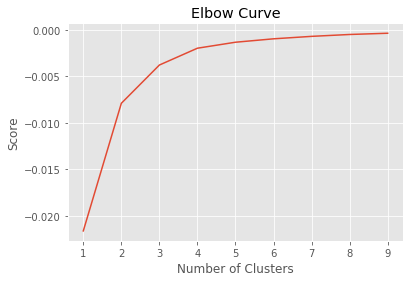

In [213]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = X[['lat']]
X_axis = X[['lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

We see here that the graphs levels off rapidly after 3 clusters. This means that we get any more value by using more than 3 clusters in our analysis

Now it is time to generate our clusters

In [225]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head()

,name,lat,lng,categories_new,cluster_label
0,MyCiti Buitensingel,-33.926930,18.413473,transport,0
1,Blue Train Station,-33.921604,18.427945,transport,0
2,Cape Town Railway Station,-33.922032,18.425467,transport,0
3,MyCiTi Station Adderley St,-33.920499,18.424889,transport,0
4,MyCiTi Station - Queens Beach,-33.921240,18.379675,transport,2


Let's visualze these results

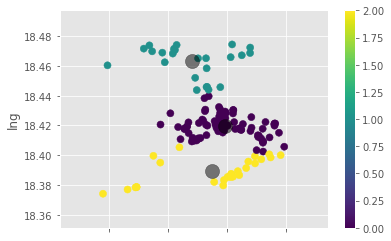

In [228]:
X.plot.scatter(
    x = 'lat', 
    y = 'lng', 
    c=labels, 
    s=50, 
    cmap='viridis')

plt.scatter(
    centers[:, 0], 
    centers[:, 1], 
    c='black', 
    s=200, 
    alpha=0.5)

These results show our three clusters but is not in context with the Geography of Cape Town. Next let's visualize these results on a Folium map

In [255]:
CapeTown_Centre

[-33.928992, 18.417396]

In [307]:
#Generate new map of Cape Town 
map_CT_all_points = folium.Map(location=[latitude, longitude], zoom_start=14)

#add clusters to map
occurences = folium.map.FeatureGroup()
n_mean = X['cluster_label'].mean()

for lat, lng in zip(X['lat'],
                     X['lng'],):
    
    occurences.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1/n_mean*5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
            #tooltip = str(number)+','+str(city) +','+ str(state)
        )
    )

map_CT_all_points.add_child(occurences)

In [310]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

#cluster = X['cluster_label']

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster in zip(X['lat'],
                             X['lng'],  
                             X['cluster_label']):
    
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = 'Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## 3.7 Examining the clusters

First let's join the three datasets - transportation, coffee shops and surrounding businesses -  into one large dataset

In [311]:
df_join = pd.merge(final_data, X, on='name', how='inner')
df_join

,address,categories,cc,city,count,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat_x,lng_x,name,neighborhood,postalCode,state,categories_new_x,label,lat_y,lng_y,categories_new_y,cluster_label
0,NaN,Bus Line,ZA,iKapa,NaN,iNingizimu Afrika,NaN,428,"[iKapa, iNingizimu Afrika]",4e53d336aeb74b74581b7bb3,"[{'label': 'display', 'lat': -33.9269297458777...",-33.926930,18.413473,MyCiti Buitensingel,NaN,NaN,Western Cape,transport,2,-33.926930,18.413473,transport,0
1,Old Marine Drive,Platform,ZA,iKapa,NaN,iNingizimu Afrika,NaN,1275,"[Old Marine Drive, iKapa, 8001, iNingizimu Afr...",52f4746811d22fb58571b779,"[{'label': 'display', 'lat': -33.9216042607502...",-33.921604,18.427945,Blue Train Station,NaN,8001,Western Cape,transport,2,-33.921604,18.427945,transport,0
2,Cape Town,Train Station,ZA,iKapa,NaN,iNingizimu Afrika,NaN,1075,"[Cape Town, iKapa, 8000, iNingizimu Afrika]",4b6840f0f964a520316e2be3,"[{'label': 'display', 'lat': -33.9220315944988...",-33.922032,18.425467,Cape Town Railway Station,NaN,8000,Western Cape,transport,2,-33.922032,18.425467,transport,0
3,Adderley St,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,Hans Strijdom,1171,"[Adderley St (Hans Strijdom), iKapa, 8001, iNi...",53356df5498e72792be4d621,"[{'label': 'display', 'lat': -33.9204993750804...",-33.920499,18.424889,MyCiTi Station Adderley St,NaN,8001,Western Cape,transport,2,-33.920499,18.424889,transport,0
4,Beach Rd,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,NaN,3589,"[Beach Rd, iKapa, iNingizimu Afrika]",5288ae5211d2141697933734,"[{'label': 'display', 'lat': -33.92124, 'lng':...",-33.921240,18.379675,MyCiTi Station - Queens Beach,NaN,NaN,Western Cape,transport,2,-33.921240,18.379675,transport,2
5,Strand St,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,Loop St,1031,"[Strand St (Loop St), iKapa, 8000, iNingizimu ...",5290e76e11d22474e261c241,"[{'label': 'display', 'lat': -33.9201049804687...",-33.920105,18.420546,MyCiTi Bus Station Strand,NaN,8000,Western Cape,transport,2,-33.920105,18.420546,transport,0
6,Waterkant Street,Parking,ZA,iKapa,NaN,iNingizimu Afrika,NaN,974,"[Waterkant Street, iKapa, 8000, iNingizimu Afr...",4c5badda6147be9acb628d09,"[{'label': 'display', 'lat': -33.9211408581725...",-33.921141,18.422067,Picbel Parkade,NaN,8000,Western Cape,transport,2,-33.921141,18.422067,transport,0
7,NaN,Bus Line,ZA,iKapa,NaN,iNingizimu Afrika,NaN,5297,"[iKapa, iNingizimu Afrika]",4ee9e413aa1f7c78108568ce,"[{'label': 'display', 'lat': -33.9605069170288...",-33.960507,18.460384,Jammie Stop&Drop,NaN,NaN,Western Cape,transport,2,-33.960507,18.460384,transport,1
8,Hertzog Blvd,Bus Station,ZA,iKapa,NaN,iNingizimu Afrika,D F Malan,1445,"[Hertzog Blvd (D F Malan), iKapa, iNingizimu A...",4ca2d4d0750ca093d3dd1367,"[{'label': 'display', 'lat': -33.9205914379767...",-33.920591,18.429325,MyCiti Bus Station Civic Centre,NaN,NaN,Western Cape,transport,2,-33.920591,18.429325,transport,0
9,NaN,Bus Line,ZA,iKapa,NaN,iNingizimu Afrika,NaN,2352,"[iKapa, iNingizimu Afrika]",599566624940bc319469c33d,"[{'label': 'display', 'lat': -33.907859, 'lng'...",-33.907859,18.417772,sightseeing (blue bus),NaN,NaN,Western Cape,transport,2,-33.907859,18.417772,transport,0


In [323]:
df_clean = df_join.loc[:, ['name', 'categories', 'categories_new_x', 'id', 'cluster_label', 'address','neighborhood']]
df_clean

,name,categories,categories_new_x,id,cluster_label,address,neighborhood
0,MyCiti Buitensingel,Bus Line,transport,4e53d336aeb74b74581b7bb3,0,NaN,NaN
1,Blue Train Station,Platform,transport,52f4746811d22fb58571b779,0,Old Marine Drive,NaN
2,Cape Town Railway Station,Train Station,transport,4b6840f0f964a520316e2be3,0,Cape Town,NaN
3,MyCiTi Station Adderley St,Bus Station,transport,53356df5498e72792be4d621,0,Adderley St,NaN
4,MyCiTi Station - Queens Beach,Bus Station,transport,5288ae5211d2141697933734,2,Beach Rd,NaN
5,MyCiTi Bus Station Strand,Bus Station,transport,5290e76e11d22474e261c241,0,Strand St,NaN
6,Picbel Parkade,Parking,transport,4c5badda6147be9acb628d09,0,Waterkant Street,NaN
7,Jammie Stop&Drop,Bus Line,transport,4ee9e413aa1f7c78108568ce,1,NaN,NaN
8,MyCiti Bus Station Civic Centre,Bus Station,transport,4ca2d4d0750ca093d3dd1367,0,Hertzog Blvd,NaN
9,sightseeing (blue bus),Bus Line,transport,599566624940bc319469c33d,0,NaN,NaN


### 3.7.1 Cluster 1

Lets create a data set for Cluster 1

In [324]:
cluster1 = df_clean.loc[df_join['cluster_label']==0]
cluster1

,name,categories,categories_new_x,id,cluster_label,address,neighborhood
0,MyCiti Buitensingel,Bus Line,transport,4e53d336aeb74b74581b7bb3,0,NaN,NaN
1,Blue Train Station,Platform,transport,52f4746811d22fb58571b779,0,Old Marine Drive,NaN
2,Cape Town Railway Station,Train Station,transport,4b6840f0f964a520316e2be3,0,Cape Town,NaN
3,MyCiTi Station Adderley St,Bus Station,transport,53356df5498e72792be4d621,0,Adderley St,NaN
5,MyCiTi Bus Station Strand,Bus Station,transport,5290e76e11d22474e261c241,0,Strand St,NaN
6,Picbel Parkade,Parking,transport,4c5badda6147be9acb628d09,0,Waterkant Street,NaN
8,MyCiti Bus Station Civic Centre,Bus Station,transport,4ca2d4d0750ca093d3dd1367,0,Hertzog Blvd,NaN
9,sightseeing (blue bus),Bus Line,transport,599566624940bc319469c33d,0,NaN,NaN
16,MyCiti Bus Stop Hill,Bus Stop,transport,5365eac3498edfa7e2cf58c8,0,NaN,NaN
17,Cape Town Station,Train Station,transport,4f48de60e4b03377e79bb487,0,NaN,NaN


In [328]:
cluster1.shape

(94, 7)

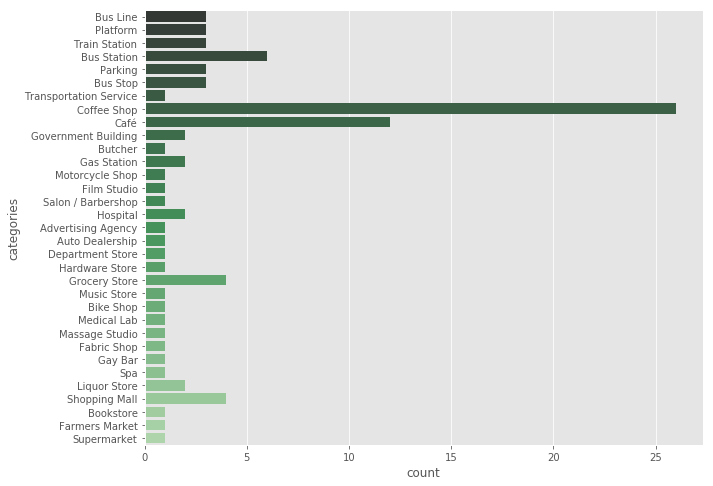

In [341]:
#Visualize the categories for Cluster 1

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(y=cluster1['categories'], ax=ax, data=cluster1, palette="Greens_d")


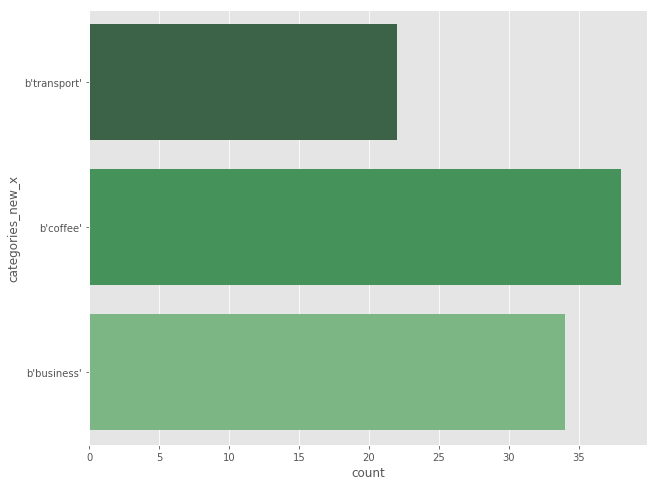

In [342]:
# Visualize the high-level categories previously create for Cluster 1

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(y=cluster1['categories_new_x'], ax=ax, data=cluster1, palette="Greens_d")

### 3.7.3 Cluster 2

Creating a dataset for Cluster 2

In [325]:
cluster2 = df_clean.loc[df_join['cluster_label']==1]
cluster2

,name,categories,categories_new_x,id,cluster_label,address,neighborhood
7,Jammie Stop&Drop,Bus Line,transport,4ee9e413aa1f7c78108568ce,1,NaN,NaN
13,MyCiti Bus Station Woodstock,Bus Station,transport,4dd38ebc7d8b6704c7a7b8ae,1,NaN,NaN
14,Observatory Train Station,Train Station,transport,4c12359d7f7f2d7f4ed2dc68,1,"Station Rd, Observatory",NaN
15,En route to Paarl,Light Rail Station,transport,4f125f70e4b01eefef34a704,1,NaN,NaN
23,Mowbray Train Station,Train Station,transport,4da283302939b1f755cf0b57,1,NaN,NaN
25,Retreat Station,Train Station,transport,4f8feaa8e4b03376fd01d7d6,1,NaN,NaN
29,Hylton Ross Exclusive Tours,Bus Station,transport,51826d03498ec71e864d1f38,1,NaN,NaN
33,I'm on a bus.,Bus Line,transport,4d92cd5a5cf5236aa50e55a3,1,NaN,NaN
39,Metrorail Observatory,Metro Station,transport,53007776498e42d85c4b7d49,1,NaN,NaN
40,MyCiti Bus Station Section,Bus Station,transport,4dd38d1318384691b9abb1de,1,NaN,NaN


In [343]:
cluster2.shape

(29, 7)

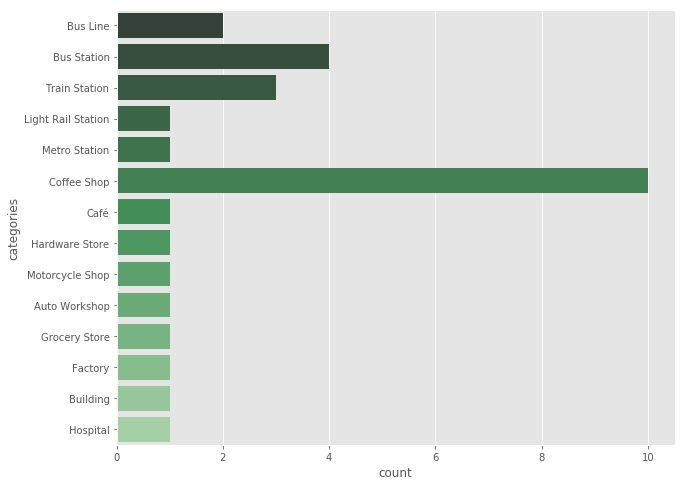

In [346]:
# Visualize categories for Cluster 2

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(y=cluster2['categories'], ax=ax, data=cluster2, palette="Greens_d")

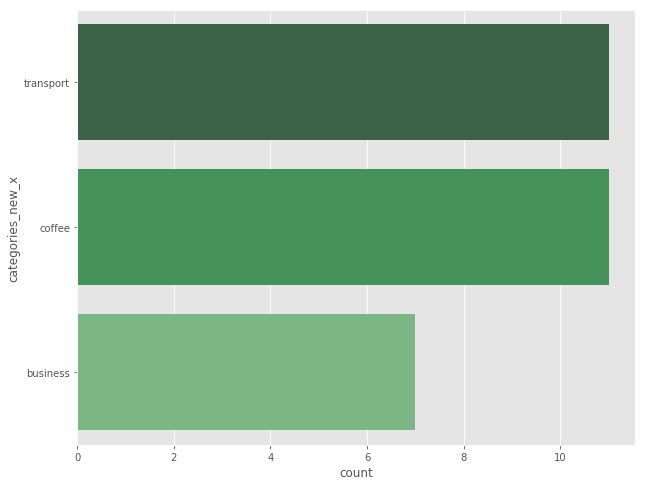

In [347]:
# Visualize high-level categories 

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(y=cluster2['categories_new_x'], ax=ax, data=cluster2, palette="Greens_d")

### 3.7.3 Cluster 3

Create dataset for Cluster 3

In [327]:
cluster3 = df_clean.loc[df_join['cluster_label']==2]
cluster3

,name,categories,categories_new_x,id,cluster_label,address,neighborhood
4,MyCiTi Station - Queens Beach,Bus Station,transport,5288ae5211d2141697933734,2,Beach Rd,NaN
10,MyCiti Lower Tafelberg,Bus Station,transport,56588f19498e5e36df173566,2,NaN,NaN
11,MyCiti 110 Table Mountain,Bus Line,transport,56588b94498ebf764cdb8e61,2,NaN,NaN
12,MyCiti Bus - St. Bedes,Bus Station,transport,5294480011d2ed6151c46675,2,NaN,NaN
21,MyCiti bus - Sea Point Pool,Bus Station,transport,52c96517498ef67574fe19bc,2,NaN,NaN
22,Brevity Lane,Bus Station,transport,5299aeea11d25cdb19a0d70d,2,NaN,NaN
28,MyCiti Bus - Upper Kloof (103),Bus Station,transport,5278830c498eb7b19dd7d023,2,NaN,NaN
31,MyCiti bus - Rhine,Bus Station,transport,52c9487d498e06032ad561c8,2,NaN,NaN
34,Boat Bay,Bus Station,transport,52ee0a97498e047d83f96be5,2,NaN,NaN
44,Coco Safar,Café,coffee,5a5f2e9bdd70c55eccf59824,2,"277 Main Road, Sea Point",Sea Point


In [348]:
cluster3.shape

(35, 7)

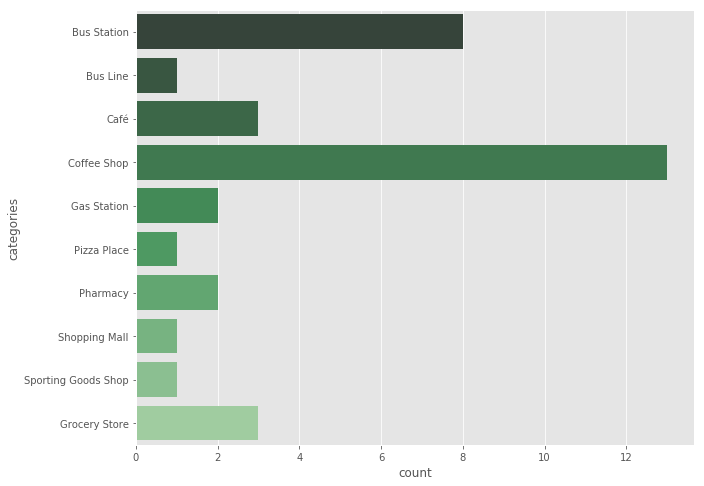

In [349]:


fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(y=cluster3['categories'], ax=ax, data=cluster3, palette="Greens_d")

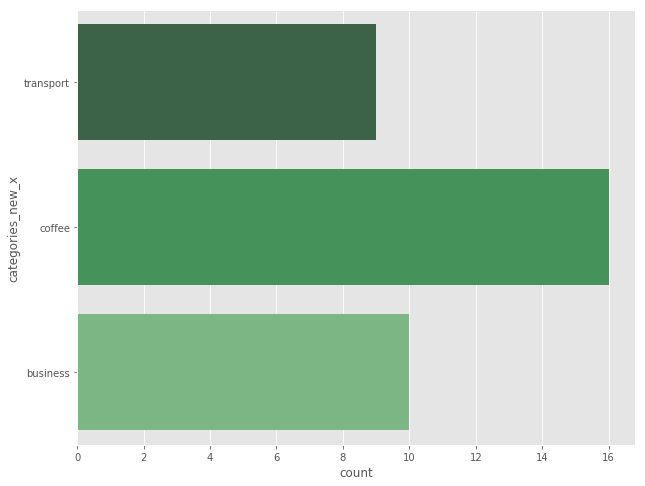

In [350]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(y=cluster3['categories_new_x'], ax=ax, data=cluster3, palette="Greens_d")

# 4. Conclusion and Discussion 

This information is available in the final report of this analysis